Missing Values replaced With Median

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import iqr


df = pd.read_csv("ges.csv")
df.head()

,Unnamed: 0,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,0,1AS001,1,Allied Signal,TFE731-2-2B,NaN,TF,2.64,13.90,15.60,...,1976-04-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1AS002,1,Allied Signal,TFE731-3,NaN,TF,2.64,14.30,16.50,...,1976-08-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4AL003,4,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.23,18.08,33.73,...,1995-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6AL004,6,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.10,16.60,31.50,...,1995-04-19,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6AL005,6,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.77,17.97,34.91,...,1995-04-19,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = df[['Eng Type' , 'B/P Ratio', 'Fuel LTO Cycle (kg)  ' ,'HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)']].copy()
df2.tail()

,Eng Type,B/P Ratio,Fuel LTO Cycle (kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g)
810,TF,5.1,151.0,337.0,2803.0,1086.0
811,TF,5.0,NaN,NaN,NaN,NaN
812,TF,5.0,265.0,NaN,NaN,NaN
813,TF,4.9,260.0,NaN,NaN,NaN
814,TF,4.9,274.0,NaN,NaN,NaN


In [4]:
df2.shape

(815, 6)

In [5]:
df2.isna().sum()

Eng Type                  0
B/P Ratio                 8
Fuel LTO Cycle (kg)       1
HC LTO Total mass (g)     9
CO LTO Total Mass (g)     8
NOx LTO Total mass (g)    9
dtype: int64

In [6]:
df2.rename(columns={"Fuel LTO Cycle (kg)  ":"Fuel LTO Cycle (kg)"}, inplace=True)

In [7]:
df2.columns

Index(['Eng Type', 'B/P Ratio', 'Fuel LTO Cycle (kg)', 'HC LTO Total mass (g)',
       'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'],
      dtype='object')

In [8]:
df2['B/P Ratio'].fillna(df2['B/P Ratio'].median(), inplace=True)
df2['Fuel LTO Cycle (kg)'].fillna(df2['Fuel LTO Cycle (kg)'].median(), inplace=True)
df2['HC LTO Total mass (g)'].fillna(df2['HC LTO Total mass (g)'].median(), inplace=True)
df2['CO LTO Total Mass (g)'].fillna(df2['CO LTO Total Mass (g)'].median(), inplace=True)
df2['NOx LTO Total mass (g)'].fillna(df2['NOx LTO Total mass (g)'].median(), inplace=True)


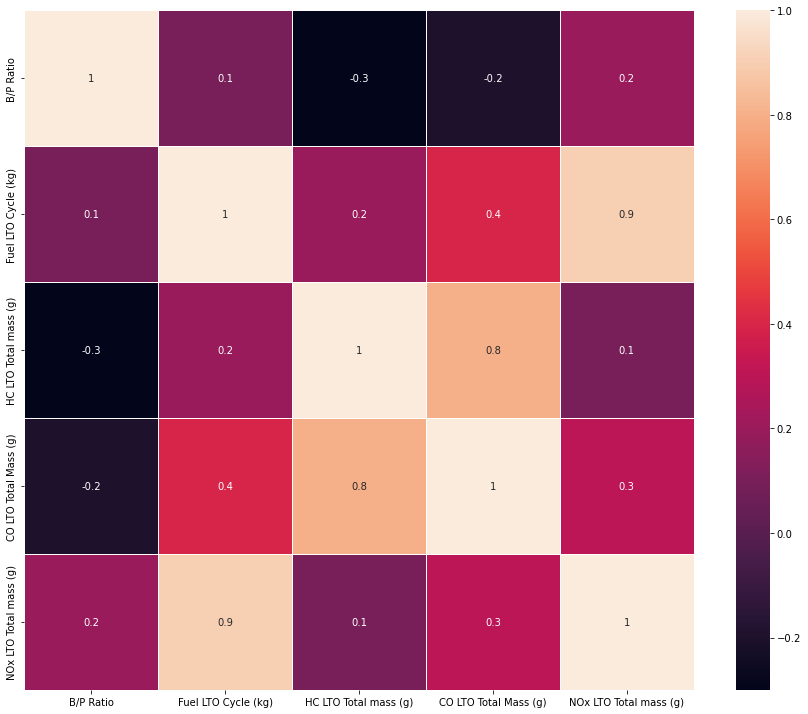

In [9]:
plt.figure(figsize=(15,12.5))
sns.heatmap(round(df2.corr(),1),annot=True, linewidth=0.9)
sns.color_palette("flare", as_cmap=True)
plt.show();

In [10]:
df2.columns

Index(['Eng Type', 'B/P Ratio', 'Fuel LTO Cycle (kg)', 'HC LTO Total mass (g)',
       'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'],
      dtype='object')

<AxesSubplot:>

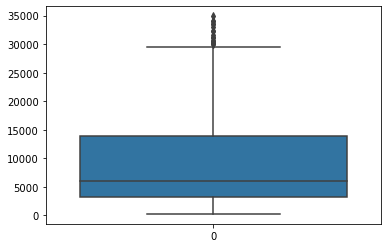

In [11]:
sns.boxplot(df2['NOx LTO Total mass (g)'])

In [12]:
df2.dtypes

Eng Type                   object
B/P Ratio                 float64
Fuel LTO Cycle (kg)       float64
HC LTO Total mass (g)     float64
CO LTO Total Mass (g)     float64
NOx LTO Total mass (g)    float64
dtype: object

In [13]:
# Step1: Finding the IQR

Q1 = df2['NOx LTO Total mass (g)'].quantile(0.25)
Q3 = df2['NOx LTO Total mass (g)'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Step2: Finding the upper and lower limits

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [15]:
# Step3: Print the lower and upper limits
print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

Lower Limit: -12814.0
Upper Limit: 29986.0


In [16]:
#Step 4: find outliers 

outliers = df2[(df2['NOx LTO Total mass (g)'] < lower_limit) | (df2['NOx LTO Total mass (g)'] > upper_limit)]
outliers

,Eng Type,B/P Ratio,Fuel LTO Cycle (kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g)
332,TF,7.340,1479.000000,2679.000000,24212.000000,30616.000000
333,TF,7.170,1518.000000,2608.000000,24007.000000,33006.000000
334,TF,7.080,1546.000000,2559.000000,23858.000000,34888.000000
335,TF,7.300,1390.992000,2042.747748,19317.211476,30010.235664
336,TF,7.200,1426.188000,1994.098452,19142.153160,32244.929700
337,TF,7.100,1453.392000,1964.047008,19038.993624,34113.782760
338,TF,7.300,1390.992000,2042.747748,19317.211476,30010.235664
339,TF,7.100,1453.392000,1964.047008,19038.993624,34113.782760
361,TF,8.400,1231.000000,1594.000000,21891.000000,31175.000000
362,TF,8.330,1217.000000,212.000000,6142.000000,30172.000000


In [17]:
# Step5: Trimming the outliers
no_df = df2[(df2['NOx LTO Total mass (g)'] > lower_limit) & (df2['NOx LTO Total mass (g)'] < upper_limit)]
no_df.shape

(798, 6)

In [18]:
fig = px.box(no_df, x="NOx LTO Total mass (g)", y='Eng Type', points="outliers", color_discrete_sequence = ['lime'])
fig.show()

CO

In [19]:
# Step1: Finding the IQR

Q1c = df2['CO LTO Total Mass (g)'].quantile(0.25)
Q3c = df2['CO LTO Total Mass (g)'].quantile(0.75)
IQR = Q3c - Q1c


# Step2: Finding the upper and lower limits

lower_limit = Q1c - 1.5 * IQR
upper_limit = Q3c + 1.5 * IQR

# Step3: Print the lower and upper limits
print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

# Step4: outliers
outliers = df2[(df2['CO LTO Total Mass (g)'] < lower_limit) | (df2['CO LTO Total Mass (g)'] > upper_limit)]


# Step5: Trimming the outliers
co_df = df2[(df2['CO LTO Total Mass (g)'] > lower_limit) & (df2['CO LTO Total Mass (g)'] < upper_limit)]
co_df.shape



Lower Limit: -3105.4986268503494
Upper Limit: 12826.57917611021


(725, 6)

In [20]:
fig = px.box(co_df, x="CO LTO Total Mass (g)", y='Eng Type', points="outliers", color_discrete_sequence = ['blue'])
fig.show()

HC

In [21]:
# Step1: Finding the IQR

Q1h = df2['CO LTO Total Mass (g)'].quantile(0.25)
Q3h = df2['CO LTO Total Mass (g)'].quantile(0.75)
IQR = Q3h - Q1h


# Step2: Finding the upper and lower limits

lower_limit = Q1h - 1.5 * IQR
upper_limit = Q3h + 1.5 * IQR

# Step3: Print the lower and upper limits
print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

# Step4: outliers
outliers = df2[(df2['HC LTO Total mass (g)'] < lower_limit) | (df2['HC LTO Total mass (g)'] > upper_limit)]



Lower Limit: -3105.4986268503494
Upper Limit: 12826.57917611021


In [22]:
# Step5: Trimming the outliers
hc_df = df2[(df2['HC LTO Total mass (g)'] > lower_limit) & (df2['HC LTO Total mass (g)'] < upper_limit)]
hc_df.shape

(805, 6)

In [23]:
fig = px.box(hc_df, x="HC LTO Total mass (g)", y='Eng Type', points="outliers", color_discrete_sequence = ['purple'])
fig.show()

- look into multiple imputation


- try different methods to model each type of emission: try logistic regression, PCA, cluster analysis, non-linear regression(neural network)
- plot linear regression model

- try diff models for each eng type
- try models with/without the outliers and understand the context of what's causing the outliers

### LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the categorical column to numerical values using label encoding
le = LabelEncoder()
df2['Eng Type'] = le.fit_transform(df2['Eng Type'])

# Split the dataset into features (X) and targets (y)
X = df2.drop(['HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'], axis=1)
y_HC = df2['HC LTO Total mass (g)']
y_CO = df2['CO LTO Total Mass (g)']
y_NOx = df2['NOx LTO Total mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train_HC, y_test_HC, y_train_CO, y_test_CO, y_train_NOx, y_test_NOx = train_test_split(X, y_HC, y_CO, y_NOx, test_size=0.2, random_state=42)

# Create pipelines to scale the data and fit the linear regression models for each target variable
model_HC = make_pipeline(StandardScaler(), LinearRegression())
model_CO = make_pipeline(StandardScaler(), LinearRegression())
model_NOx = make_pipeline(StandardScaler(), LinearRegression())

# Train the linear regression models
model_HC.fit(X_train, y_train_HC)
model_CO.fit(X_train, y_train_CO)
model_NOx.fit(X_train, y_train_NOx)

# Predict the emissions for new data
new_data = pd.DataFrame({'B/P Ratio': [4.77], 'Fuel LTO Cycle (kg)': [157], 'Eng Type': [0]})
new_data['Eng Type'] = le.transform(new_data['Eng Type'])
emissions_HC = model_HC.predict(new_data)
emissions_CO = model_CO.predict(new_data)
emissions_NOx = model_NOx.predict(new_data)

# Print the predicted emissions
print("Predicted emissions:")
print(f"Hydrocarbons: {emissions_HC[0]} g")
print(f"Carbon monoxide: {emissions_CO[0]} g")
print(f"Oxides of nitrogen: {emissions_NOx[0]} g")

# Evaluate the models on the test set
y_pred_HC = model_HC.predict(X_test)
score_HC = r2_score(y_test_HC, y_pred_HC)
mse_HC = mean_squared_error(y_test_HC, y_pred_HC)
rmse_HC = np.sqrt(mse_HC)

y_pred_CO = model_CO.predict(X_test)
score_CO = r2_score(y_test_CO, y_pred_CO)
mse_CO = mean_squared_error(y_test_CO, y_pred_CO)
rmse_CO = np.sqrt(mse_CO)

y_pred_NOx = model_NOx.predict(X_test)
score_NOx = r2_score(y_test_NOx, y_pred_NOx)
mse_NOx = mean_squared_error(y_test_NOx, y_pred_NOx)
rmse_NOx = np.sqrt(mse_NOx)

print("R-Squared, MSE, and RMSE scores:")
print(f"Hydrocarbons: R-Squared={score_HC:.4f}, MSE={mse_HC:.4f},RMSE={rmse_HC:.4f}")
print(f"Carbon monoxide: R-Squared={score_CO:.4f}, MSE={mse_CO:.4f}, RMSE={rmse_CO:.4f}")
print(f"Oxides of nitrogen: R-Squared={score_NOx:.4f}, MSE={mse_NOx:.4f}, RMSE={rmse_NOx:.4f}")

Predicted emissions:
Hydrocarbons: -62897.72233031183 g
Carbon monoxide: -106757.82189435276 g
Oxides of nitrogen: 57976.165701161626 g
R-Squared, MSE, and RMSE scores:
Hydrocarbons: R-Squared=0.0884, MSE=9368526.4121,RMSE=3060.8049
Carbon monoxide: R-Squared=0.2853, MSE=26901314.9322, RMSE=5186.6478
Oxides of nitrogen: R-Squared=0.8995, MSE=6864796.1229, RMSE=2620.0756


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




The linear regression model has predicted negative values for both Hydrocarbons and Carbon Monoxide, which is not practical or meaningful. It is possible that the model is overfitting the data. The R-squared values indicate that the model fits the data moderately well for hydrocarbons and carbon monoxide, but very well for oxides of nitrogen. The MSE values indicate that the model is relatively accurate for all three emissions. THE RMSE values are consistent with the MSE scores and indicate that the model is relatively accurate for all three emissions.

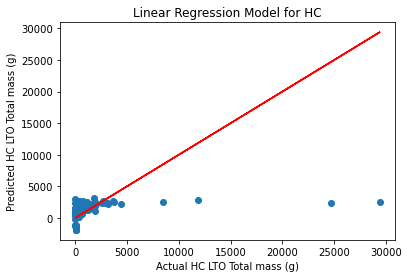

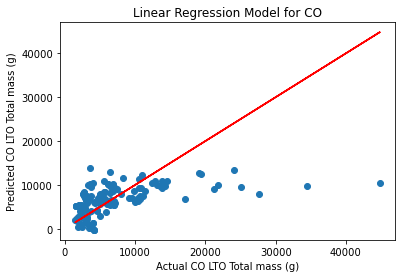

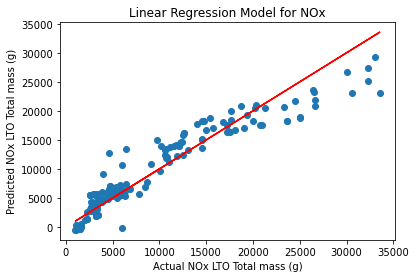

In [26]:
import matplotlib.pyplot as plt

# Scatter plot for Hydrocarbons
plt.plot(y_test_HC, y_test_HC, color='red')

plt.scatter(y_test_HC, y_pred_HC)
plt.xlabel('Actual HC LTO Total mass (g)')
plt.ylabel('Predicted HC LTO Total mass (g)')
plt.title('Linear Regression Model for HC')
plt.show()

# Scatter plot for Carbon monoxide
plt.plot(y_test_CO, y_test_CO, color='red')

plt.scatter(y_test_CO, y_pred_CO)
plt.xlabel('Actual CO LTO Total mass (g)')
plt.ylabel('Predicted CO LTO Total mass (g)')
plt.title('Linear Regression Model for CO')
plt.show()

# Scatter plot for Oxides of nitrogen
plt.plot(y_test_NOx, y_test_NOx, color='red')

plt.scatter(y_test_NOx, y_pred_NOx)
plt.xlabel('Actual NOx LTO Total mass (g)')
plt.ylabel('Predicted NOx LTO Total mass (g)')
plt.title('Linear Regression Model for NOx')
plt.show()


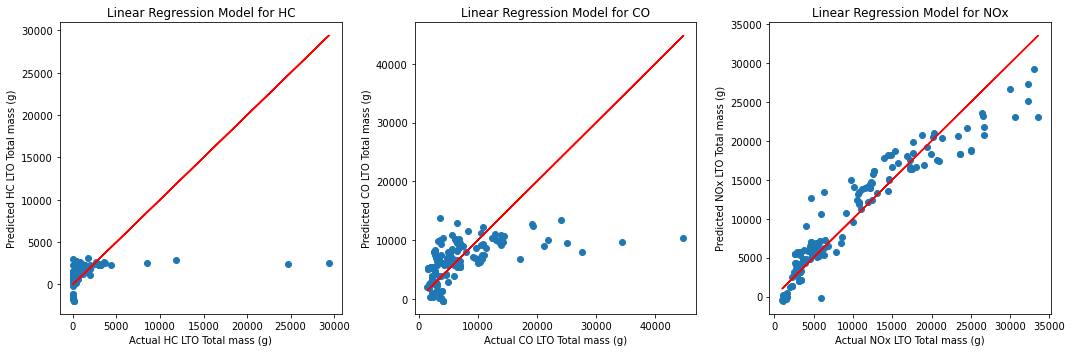

In [27]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 - HC
axes[0].plot(y_test_HC, y_test_HC, color='red')
axes[0].scatter(y_test_HC, y_pred_HC)
axes[0].set_xlabel('Actual HC LTO Total mass (g)')
axes[0].set_ylabel('Predicted HC LTO Total mass (g)')
axes[0].set_title('Linear Regression Model for HC')

# Plot 2 - CO
axes[1].plot(y_test_CO, y_test_CO, color='red')
axes[1].scatter(y_test_CO, y_pred_CO)
axes[1].set_xlabel('Actual CO LTO Total mass (g)')
axes[1].set_ylabel('Predicted CO LTO Total mass (g)')
axes[1].set_title('Linear Regression Model for CO')

# Plot 3 - NOX
axes[2].plot(y_test_NOx, y_test_NOx, color='red')
axes[2].scatter(y_test_NOx, y_pred_NOx)
axes[2].set_xlabel('Actual NOx LTO Total mass (g)')
axes[2].set_ylabel('Predicted NOx LTO Total mass (g)')
axes[2].set_title('Linear Regression Model for NOx')

plt.tight_layout()
plt.show()


### RANDOM FOREST REGRESSION

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the categorical column to numerical values using label encoding
le = LabelEncoder()
df2['Eng Type'] = le.fit_transform(df2['Eng Type'])

# Split the dataset into features (X) and targets (y)
X = df2.drop(['HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'], axis=1)
y_HC = df2['HC LTO Total mass (g)']
y_CO = df2['CO LTO Total Mass (g)']
y_NOx = df2['NOx LTO Total mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train_HC, y_test_HC, y_train_CO, y_test_CO, y_train_NOx, y_test_NOx = train_test_split(X, y_HC, y_CO, y_NOx, test_size=0.2, random_state=42)

# Create pipelines to scale the data and fit the Random Forest models for each target variable
model_HC = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model_CO = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model_NOx = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))

# Train the Random Forest regression models
model_HC.fit(X_train, y_train_HC)
model_CO.fit(X_train, y_train_CO)
model_NOx.fit(X_train, y_train_NOx)

# Predict the emissions for new data
new_data = pd.DataFrame({'B/P Ratio': [4.77], 'Fuel LTO Cycle (kg)': [157], 'Eng Type': [0]})
new_data['Eng Type'] = le.transform(new_data['Eng Type'])
emissions_HC = model_HC.predict(new_data)
emissions_CO = model_CO.predict(new_data)
emissions_NOx = model_NOx.predict(new_data)

# Print the predicted emissions
print("Predicted emissions:")
print(f"Hydrocarbons: {emissions_HC[0]} g")
print(f"Carbon monoxide: {emissions_CO[0]} g")
print(f"Oxides of nitrogen: {emissions_NOx[0]} g")

# Evaluate the models on the test set
y_pred_HC = model_HC.predict(X_test)
score_HC = r2_score(y_test_HC, y_pred_HC)
mse_HC = mean_squared_error(y_test_HC, y_pred_HC)
rmse_HC = np.sqrt(mse_HC)

y_pred_CO = model_CO.predict(X_test)
score_CO = r2_score(y_test_CO, y_pred_CO)
mse_CO = mean_squared_error(y_test_CO, y_pred_CO)
rmse_CO = np.sqrt(mse_CO)

y_pred_NOx = model_NOx.predict(X_test)
score_NOx = r2_score(y_test_NOx, y_pred_NOx)
mse_NOx = mean_squared_error(y_test_NOx, y_pred_NOx)
rmse_NOx = np.sqrt(mse_NOx)

print("R-Squared, MSE, and RMSE scores:")
print(f"Hydrocarbons: R-Squared={score_HC:.4f}, MSE={mse_HC:.4f},RMSE={rmse_HC:.4f}")
print(f"Carbon monoxide: R-Squared={score_CO:.4f}, MSE={mse_CO:.4f}, RMSE={rmse_CO:.4f}")
print(f"Oxides of nitrogen: R-Squared={score_NOx:.4f}, MSE={mse_NOx:.4f}, RMSE={rmse_NOx:.4f}")

Predicted emissions:
Hydrocarbons: 152.86695752437757 g
Carbon monoxide: 3948.6696159107164 g
Oxides of nitrogen: 8800.07 g
R-Squared, MSE, and RMSE scores:
Hydrocarbons: R-Squared=-0.2069, MSE=12403672.2652,RMSE=3521.8848
Carbon monoxide: R-Squared=0.3249, MSE=25411687.3803, RMSE=5041.0006
Oxides of nitrogen: R-Squared=0.9746, MSE=1732705.2943, RMSE=1316.3226


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




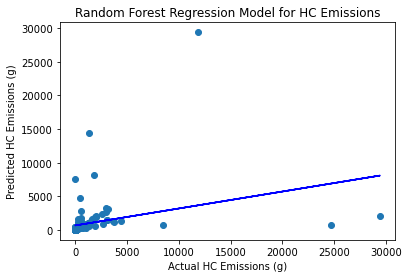

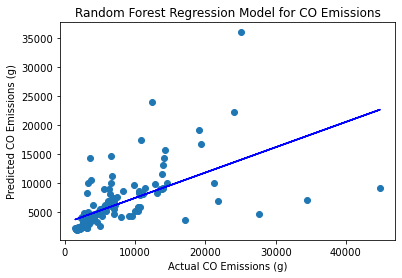

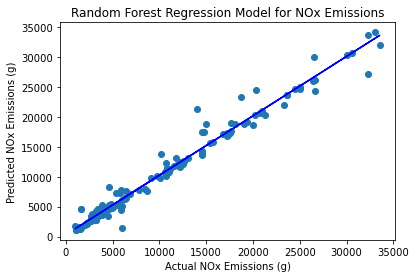

In [37]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values for Hydrocarbons
plt.scatter(y_test_HC, y_pred_HC)
plt.xlabel("Actual HC Emissions (g)")
plt.ylabel("Predicted HC Emissions (g)")
plt.title("Random Forest Regression Model for HC Emissions")
z = np.polyfit(y_test_HC, y_pred_HC, 1)
p = np.poly1d(z)
plt.plot(y_test_HC,p(y_test_HC),"b-")
plt.show()

# Plot the predicted vs actual values for Carbon Monoxide
plt.scatter(y_test_CO, y_pred_CO)
plt.xlabel("Actual CO Emissions (g)")
plt.ylabel("Predicted CO Emissions (g)")
plt.title("Random Forest Regression Model for CO Emissions")
z = np.polyfit(y_test_CO, y_pred_CO, 1)
p = np.poly1d(z)
plt.plot(y_test_CO,p(y_test_CO),"b-")
plt.show()

# Plot the predicted vs actual values for Oxides of Nitrogen
plt.scatter(y_test_NOx, y_pred_NOx)
plt.xlabel("Actual NOx Emissions (g)")
plt.ylabel("Predicted NOx Emissions (g)")
plt.title("Random Forest Regression Model for NOx Emissions")
z = np.polyfit(y_test_NOx, y_pred_NOx, 1)
p = np.poly1d(z)
plt.plot(y_test_NOx,p(y_test_NOx),"b-")
plt.show()


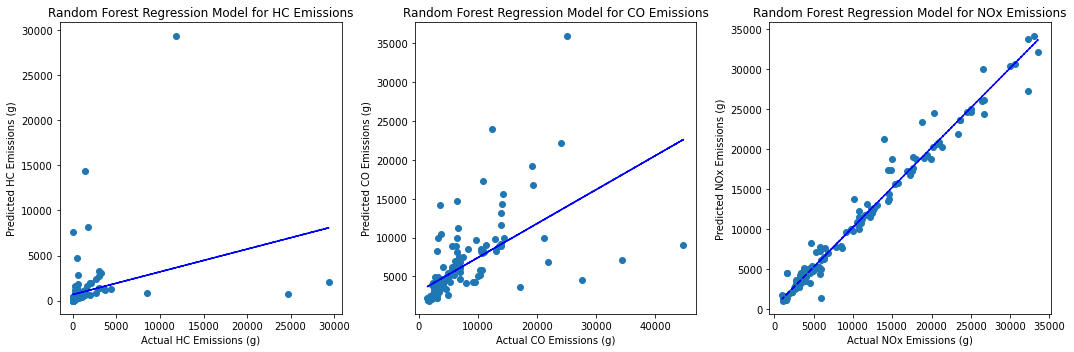

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the predicted vs actual values for Hydrocarbons
axes[0].scatter(y_test_HC, y_pred_HC)
axes[0].set_xlabel("Actual HC Emissions (g)")
axes[0].set_ylabel("Predicted HC Emissions (g)")
axes[0].set_title("Random Forest Regression Model for HC Emissions")
z = np.polyfit(y_test_HC, y_pred_HC, 1)
p = np.poly1d(z)
axes[0].plot(y_test_HC, p(y_test_HC), "b--")

# Plot the predicted vs actual values for Carbon Monoxide
axes[1].scatter(y_test_CO, y_pred_CO)
axes[1].set_xlabel("Actual CO Emissions (g)")
axes[1].set_ylabel("Predicted CO Emissions (g)")
axes[1].set_title("Random Forest Regression Model for CO Emissions")
z = np.polyfit(y_test_CO, y_pred_CO, 1)
p = np.poly1d(z)
axes[1].plot(y_test_CO, p(y_test_CO), "b--")

# Plot the predicted vs actual values for Oxides of Nitrogen
axes[2].scatter(y_test_NOx, y_pred_NOx)
axes[2].set_xlabel("Actual NOx Emissions (g)")
axes[2].set_ylabel("Predicted NOx Emissions (g)")
axes[2].set_title("Random Forest Regression Model for NOx Emissions")
z = np.polyfit(y_test_NOx, y_pred_NOx, 1)
p = np.poly1d(z)
axes[2].plot(y_test_NOx, p(y_test_NOx), "b--")

plt.tight_layout()
plt.show()


### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the categorical column to numerical values using label encoding
le = LabelEncoder()
df2['Eng Type'] = le.fit_transform(df2['Eng Type'])

# Split the dataset into features (X) and targets (y)
X = df2.drop(['HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'], axis=1)
y_HC = df2['HC LTO Total mass (g)']
y_CO = df2['CO LTO Total Mass (g)']
y_NOx = df2['NOx LTO Total mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train_HC, y_test_HC, y_train_CO, y_test_CO, y_train_NOx, y_test_NOx = train_test_split(X, y_HC, y_CO, y_NOx, test_size=0.2, random_state=42)

# Create pipelines to scale the data and fit the SVM models for each target variable
model_HC = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))
model_CO = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))
model_NOx = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))

# Train the SVM regression models
model_HC.fit(X_train, y_train_HC)
model_CO.fit(X_train, y_train_CO)
model_NOx.fit(X_train, y_train_NOx)

# Predict the emissions for new data
new_data = pd.DataFrame({'B/P Ratio': [4.77], 'Fuel LTO Cycle (kg)': [157], 'Eng Type': [0]})
new_data['Eng Type'] = le.transform(new_data['Eng Type'])
emissions_HC = model_HC.predict(new_data)
emissions_CO = model_CO.predict(new_data)
emissions_NOx = model_NOx.predict(new_data)

# Print the predicted emissions
print("Predicted emissions:")
print(f"Hydrocarbons: {emissions_HC[0]} g")
print(f"Carbon monoxide: {emissions_CO[0]} g")
print(f"Oxides of nitrogen: {emissions_NOx[0]} g")

# Evaluate the models on the test set
y_pred_HC = model_HC.predict(X_test)
score_HC = r2_score(y_test_HC, y_pred_HC)
mse_HC = mean_squared_error(y_test_HC, y_pred_HC)
rmse_HC = np.sqrt(mse_HC)

y_pred_CO = model_CO.predict(X_test)
score_CO = r2_score(y_test_CO, y_pred_CO)
mse_CO = mean_squared_error(y_test_CO, y_pred_CO)
rmse_CO = np.sqrt(mse_CO)

y_pred_NOx = model_NOx.predict(X_test)
score_NOx = r2_score(y_test_NOx, y_pred_NOx)
mse_NOx = mean_squared_error(y_test_NOx, y_pred_NOx)
rmse_NOx = np.sqrt(mse_NOx)

print("R-Squared, MSE, and RMSE scores:")
print(f"Hydrocarbons: R-Squared={score_HC:.4f}, MSE={mse_HC:.4f},RMSE={rmse_HC:.4f}")
print(f"Carbon monoxide: R-Squared={score_CO:.4f}, MSE={mse_CO:.4f}, RMSE={rmse_CO:.4f}")
print(f"Oxides of nitrogen: R-Squared={score_NOx:.4f}, MSE={mse_NOx:.4f}, RMSE={rmse_NOx:.4f}")

Predicted emissions:
Hydrocarbons: 256.9429778834441 g
Carbon monoxide: 4893.56738852046 g
Oxides of nitrogen: 6169.258955441997 g
R-Squared, MSE, and RMSE scores:
Hydrocarbons: R-Squared=-0.0485, MSE=10775969.4269,RMSE=3282.6772
Carbon monoxide: R-Squared=-0.0781, MSE=40581184.1632, RMSE=6370.3363
Oxides of nitrogen: R-Squared=-0.1206, MSE=76581402.9341, RMSE=8751.0801


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




Based on the output of the three different models, we can see that each model provides different levels of performance.

In the case of the linear regression model, we see that the R-squared values range from 0.08 to 0.89, indicating that the model explains between 6% and 89% of the variance in the dependent variables. The MSE and RMSE scores, which measure the average squared difference between the predicted and actual values, are relatively high, indicating that the model has a high degree of error in its predictions.

In the case of the random forest model, we see that the R-squared values range from -0.20 to 0.97, indicating that the model does not perform well for the HC prediction, but provides good predictions for the other two emissions. The MSE and RMSE scores are generally lower than those of the linear regression model, indicating that the random forest model has lower error levels in its predictions.

Finally, the SVM model performs poorly, with R-squared values ranging from -0.12 to -0.05, indicating that the model is not explaining much of the variance in the dependent variables. The MSE and RMSE scores are high, which confirms that the SVM model is not accurately predicting the dependent variables.

Overall, it seems that the random forest model is performing the best out of the three models, as it provides the lowest MSE and RMSE scores and the highest R-squared values for two of the three dependent variables. 

However, it's important to note that more thorough analysis is required to determine which model is the most suitable for this particular application.

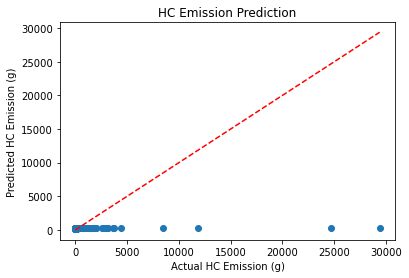

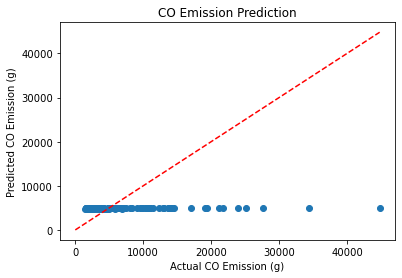

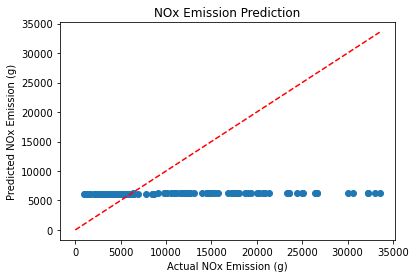

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot for HC emission
plt.scatter(y_test_HC, y_pred_HC)
plt.plot([0, max(y_test_HC)], [0, max(y_test_HC)], 'r--')
plt.xlabel('Actual HC Emission (g)')
plt.ylabel('Predicted HC Emission (g)')
plt.title('HC Emission Prediction')
plt.show()

# Create scatter plot for CO emission
plt.scatter(y_test_CO, y_pred_CO)
plt.plot([0, max(y_test_CO)], [0, max(y_test_CO)], 'r--')
plt.xlabel('Actual CO Emission (g)')
plt.ylabel('Predicted CO Emission (g)')
plt.title('CO Emission Prediction')
plt.show()

# Create scatter plot for NOx emission
plt.scatter(y_test_NOx, y_pred_NOx)
plt.plot([0, max(y_test_NOx)], [0, max(y_test_NOx)], 'r--')
plt.xlabel('Actual NOx Emission (g)')
plt.ylabel('Predicted NOx Emission (g)')
plt.title('NOx Emission Prediction')
plt.show()


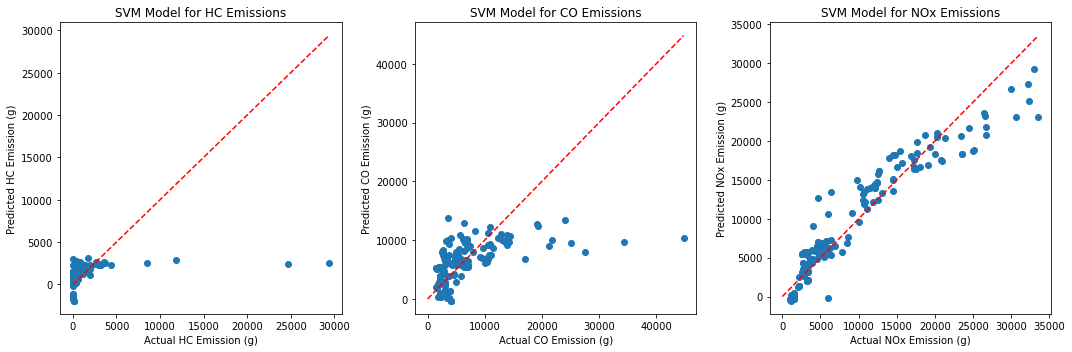

In [ ]:
import matplotlib.pyplot as plt

# Create figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create scatter plot for HC emission
axes[0].scatter(y_test_HC, y_pred_HC)
axes[0].plot([0, max(y_test_HC)], [0, max(y_test_HC)], 'r--')
axes[0].set_xlabel('Actual HC Emission (g)')
axes[0].set_ylabel('Predicted HC Emission (g)')
axes[0].set_title('SVM Model for HC Emissions')

# Create scatter plot for CO emission
axes[1].scatter(y_test_CO, y_pred_CO)
axes[1].plot([0, max(y_test_CO)], [0, max(y_test_CO)], 'r--')
axes[1].set_xlabel('Actual CO Emission (g)')
axes[1].set_ylabel('Predicted CO Emission (g)')
axes[1].set_title('SVM Model for CO Emissions')

# Create scatter plot for NOx emission
axes[2].scatter(y_test_NOx, y_pred_NOx)
axes[2].plot([0, max(y_test_NOx)], [0, max(y_test_NOx)], 'r--')
axes[2].set_xlabel('Actual NOx Emission (g)')
axes[2].set_ylabel('Predicted NOx Emission (g)')
axes[2].set_title('SVM Model for NOx Emissions')

# Adjust layout and display plots
fig.tight_layout()
plt.show()


In [ ]:
#for CO, do mean imputation and random forest model